# Documentation by example for `shap.plots.waterfall`

This notebook is designed to demonstrate (and so document) how to use the `shap.plots.waterfall` function. It uses an XGBoost model trained on the classic UCI adult income dataset (which is classification task to predict if people made over \\$50k in the 90s).

<hr>
<center style="color: red">
<b>Warning!</b> This notebook documents the new SHAP API, and that API is still stablizing over the coming weeks.
    </center>
<hr>

In [1]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 97%|=================== | 31480/32561 [00:29<00:00]       

Waterfall plots are designed to display explanations for individual predictions, so they expect a single row of an Explanation object as input. The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

Below is an example that plots the first explanation. Note that by default SHAP explains XGBoost classifer models in terms of their margin output, before the logistic link function. That means the units on the x-axis are log-odds units, so negative values imply probabilies of less than 0.5 that the person makes over $50k annually. The gray text before the feature names shows the value of each feature for this sample.

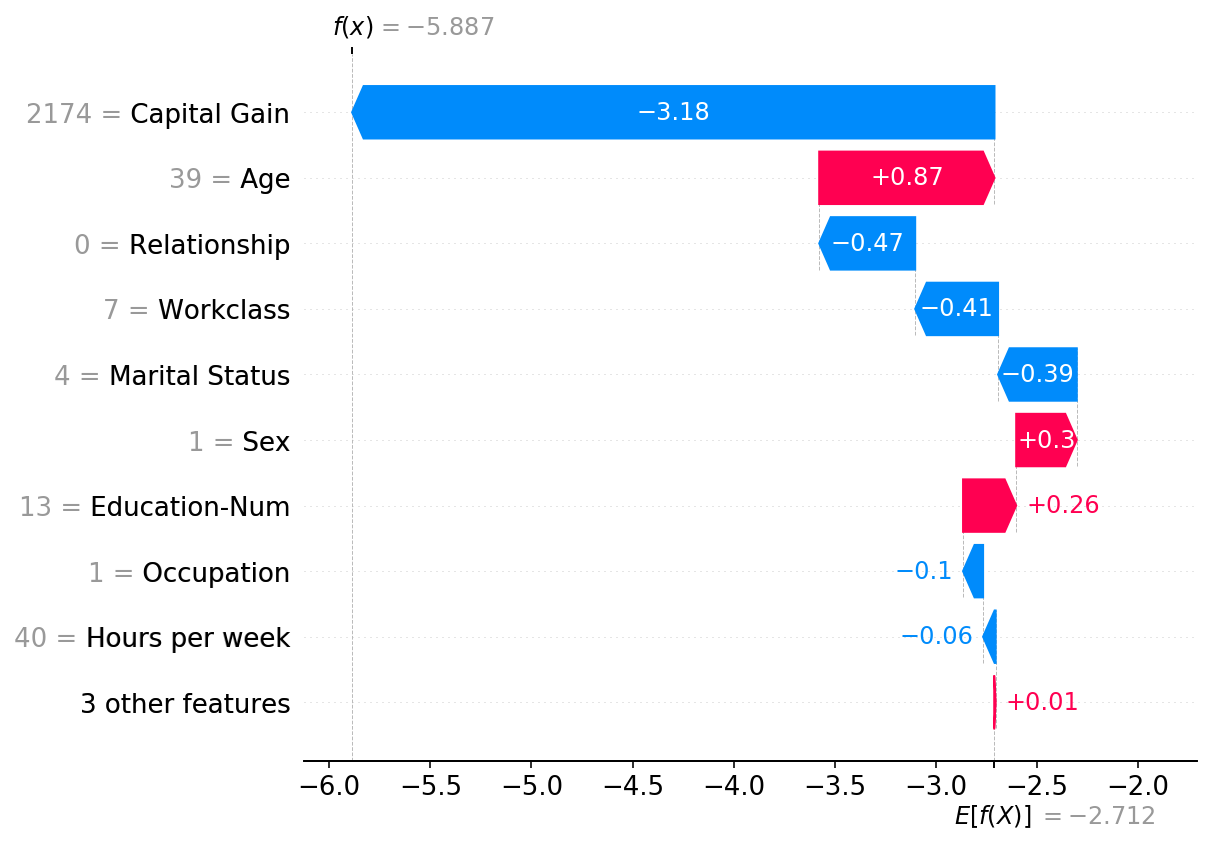

In [2]:
shap.plots.waterfall(shap_values[0])

Note that in the above explanation the three least impactful features have been collapsed into a single term so that we don't show more than 10 rows in the plot. The default limit of 10 rows can be changed using the `max_display` argument:

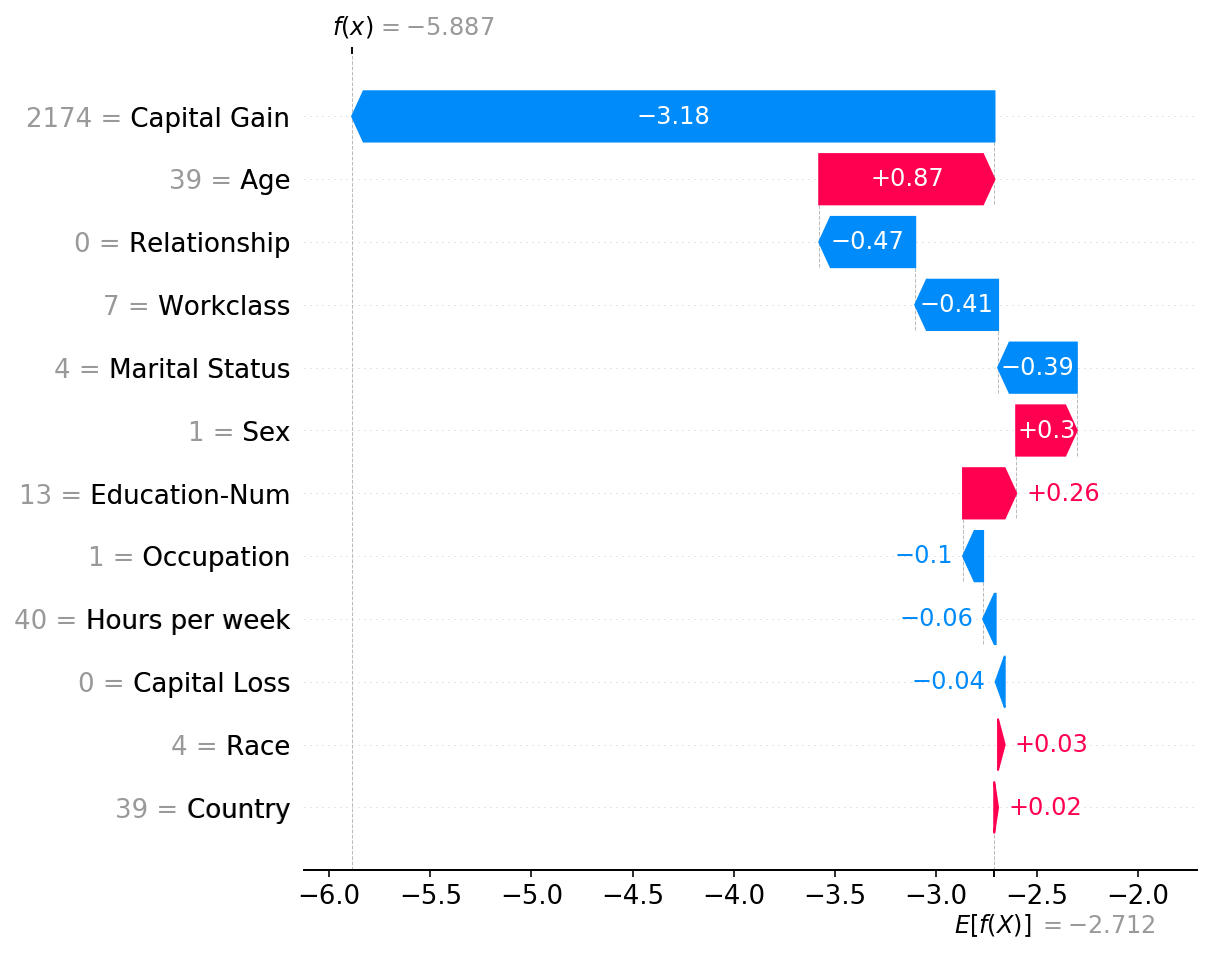

In [3]:
shap.plots.waterfall(shap_values[0], max_display=20)

It is interesting that having a capital gain of \\$2,174 dramatically reduces this person's predicted probability of making over \\$50k annually. Since `waterfall` plots only show a single sample worth of data, we can't see the impact of changing capital gain. To see this we can use a `scatter` plot, which shows how low values for captial gain are a more negative predictor of income that no captial gain at all. Why this happens would require a deeper dive into the data, and should also involve training a model more carefully and with bootstrap resamples to quantify any uncertainty in the model building process.

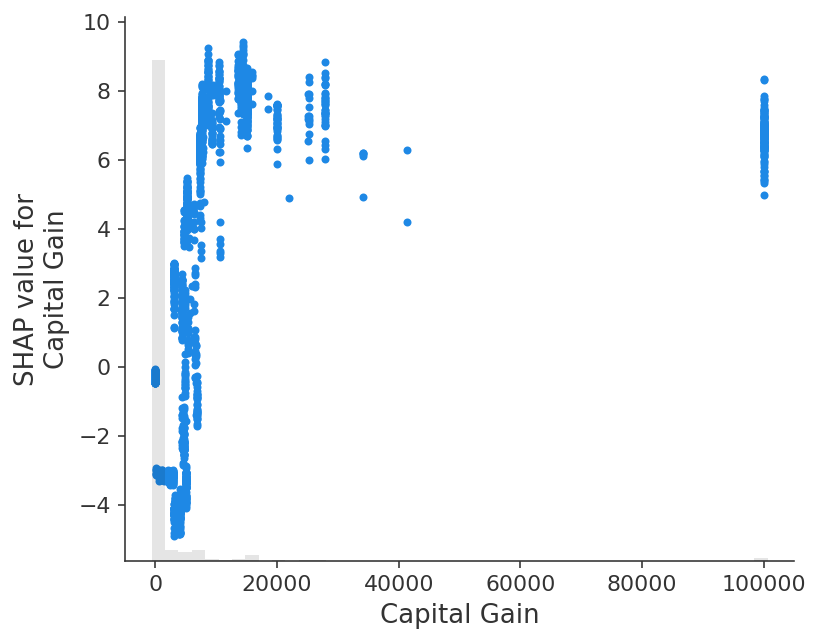

In [4]:
shap.plots.scatter(shap_values[:,"Capital Gain"])

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 